In [1]:
import time
#import board
#import busio
import pandas as pd
from pandas import DataFrame
from matplotlib import pylab
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as clrs
import matplotlib.cm as cm
import matplotlib.dates as mdates
import matplotlib
import seaborn as sns
import datetime
import os
from pandas import concat
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime, timedelta

from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.regularizers import l2
from numpy import loadtxt
from keras.models import load_model
from keras.callbacks import ModelCheckpoint

Using TensorFlow backend.


In [2]:
def fileNameForDLFigures(midfix = None):
    
    
    from datetime import date
    today = date.today()
    # dd/mm/YY
    d1 = today.strftime("%d_%m_%Y")
    #print("d1 =", d1)
    cwdir = os.getcwd()
    mkSubDir =  os.path.join(cwdir, d1)
    mkSubDir
    if not os.path.exists(mkSubDir):
        #os.makedirs('my_folder')
        os.mkdir(mkSubDir)
    #path = '/home/yogender/Desktop/KaggleHousePricePrediction/raspiData/Raspi2_second_currentLoop_RemoteMySql'
    #file_name = 'csvFile_2021_04_20'
    head, tail = os.path.split(file())
    name =tail.split('_')[1:]
    file_name = "_".join(name)
    file_name=file_name.split('.')[0]
    #join

    #file_name = 'DL_2021_04_28'
    #file_name = 'csvFile_2021_04_19'
    #file_name ='csvFile_2021_03_30'
    
    #cwdir = os.getcwd()
    #mkSubDir =  os.path.join(cwdir, 'DL_sub')
    suffix = '.svg'
    filePath = os.path.join(mkSubDir, midfix + file_name +suffix)
    return  filePath

In [3]:
def file():
    
    #path = '/home/yogender/Desktop/KaggleHousePricePrediction/raspiData/Raspi2_second_currentLoop_RemoteMySql'
    #file_name = 'csvFile_2021_04_20'
    #file_name = 'csvFile_2021_04_28'
    #file_name = 'csvFile_2021_04_28'
    file_name = 'csvFile_2021_05_24'
    #file_name = 'DLTemLongerDatasetDischargecsvFile_2021_05_20'
    #file_name = 'csvFile_2021_04_19'
    #file_name ='csvFile_2021_03_30'
    suffix = '.csv'
    filePath = os.path.join(os.getcwd(), file_name + suffix)
    return  filePath


In [4]:
def modelDir(ModelName=None):
    model = fileNameForDLFigures(midfix = 'Tem').split('/')[:-1]
    model_dir = "/".join(model)
    #model_dir 
    modelPath = os.path.join(model_dir, ModelName)
    return modelPath

In [5]:
def filePath2Pandas(file_path):
    drop_column = 'Unnamed: 0'
    df = pd.read_csv(file_path, delimiter=',').drop(drop_column, axis = 'columns')

    column_names =  ['id', 'dateTime', 'Tamb', 'TtopTestTankHPCir', 'TbottomTestTankHpCir',
       'TtopSourceTank', 'TloadTankMix', 'TTopTestTankLoadCir', 'TloadMix',
       'TbottomSourceTank', 'TbottomTestTankLoadCir', 'T4', 'T3', 'T2', 'T1',
        'T0', 'T9', 'T8', 'T7', 'T6', 'T5', 'flowHP', 'flowLoad', 'Load_kW',
       'Heat_Capacity_kW', 'electrcity_kW', 'COP', 'nDis', 'timeStamp_Temp',
       'timeStamp_watt', 'entropy_kJ/K', 'entropy_kJ', 'nStratCharging',
       'TotalTanksEnergyForAvailability_kJ', 'DisEntropy_kj/K',
       'DisEntropy_kj', 'nStratDischarge',
       'DisTotalTanksEnergyForAvailability_kJ']
    df.columns =column_names
    df = df[['id', 'dateTime', 'Tamb', 'TtopTestTankHPCir', 'TbottomTestTankHpCir',
       'TtopSourceTank', 'TloadTankMix', 'TTopTestTankLoadCir', 'TloadMix',
       'TbottomSourceTank', 'TbottomTestTankLoadCir', 'T0', 'T1', 'T2', 'T3',
        'T4', 'T5', 'T6', 'T7', 'T8', 'T9', 'flowHP', 'flowLoad', 'Load_kW',
       'Heat_Capacity_kW', 'electrcity_kW', 'COP', 'nDis', 'timeStamp_Temp',
       'timeStamp_watt', 'entropy_kJ/K', 'entropy_kJ', 'nStratCharging',
       'TotalTanksEnergyForAvailability_kJ', 'DisEntropy_kj/K',
       'DisEntropy_kj', 'nStratDischarge',
       'DisTotalTanksEnergyForAvailability_kJ']]
    
    #df.columns.values[[11,12,13,14,15,16,17,18,19,20]] = ['T0', 'T1', 'T2', 'T3','T4', 'T5', 'T6', 'T7', 'T8', 'T9']

    return df
df_gross=filePath2Pandas(file())  


In [6]:
gross_tem = df_gross[['T0', 'T1', 'T2', 'T3','T4', 'T5', 'T6', 'T7', 'T8', 'T9']]

In [7]:
gross_tem_oneValue = gross_tem[[ 'T6']]

In [8]:
gross_tem_oneValue

,T6
0,24.7534
1,24.7534
2,24.8548
3,24.8887
4,24.8887
...,...
1291,24.5166
1292,24.5504
1293,24.5843
1294,24.5504


/home/yogender/miniconda3/envs/kerasClone/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f2e81a02b90>)

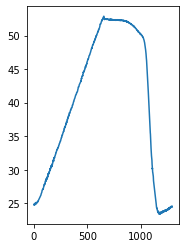

In [9]:
fig = plt.figure(1)
ax = fig.add_subplot(121)

#fig.canvas.draw()
fig.show()
#fig.canvas.draw()
#plt.rcParams["figure.figsize"]=5,5
#fig_size = plt.rcParams["figure.figsize"]
#fig_size[0] = 8
#fig_size[1] = 3

def plotObject(df, ax, fig, alpha =0.7, scm=None):
    #ax.clear()
    #df= df.iloc[:, 1:]
    #df = df.iloc[:, 3:]
    for i in range (0, df.shape[1]):
        #print ('last shape[1] is:', df.shape[1])
        ax.plot(df.index, df.iloc[:, i],\
                label = 'Layer ' + str(i))
        
    #fig.canvas.draw()
    #ax.legend()
    #fig.show()
    #print ('df is :', df)
    #plt.legend(loc='upper left')
    return fig, ax
plotObject(gross_tem_oneValue, ax, fig, alpha =0.7, scm=None)

In [10]:
"""
Normalization should be done BEFORE one prepares the data for ANN or LSTM input.
Normalization is done feature-wise (that means column-wise).
"""

def normalize(X):
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaler = scaler.fit(X)
    scaled_data = scaler.transform(X)
    return scaled_data, scaler

df_nrm_dis, scaler = normalize(gross_tem_oneValue)
df_nrm_dis = pd.DataFrame(df_nrm_dis)
#df_nrm.columns = chargingIn_df.columns

df_nrm_dis.columns = [ 'T6']
df_nrm_dis


,T6
0,0.045891
1,0.045891
2,0.049331
3,0.050481
4,0.050481
...,...
1291,0.037858
1292,0.039004
1293,0.040154
1294,0.039004


In [12]:
k =3
n_features = 2
#out_features = y_train.shape[1]
#out_features
epochs =5000
batch_size = 500

In [13]:
def flatten_row_wise(df):
    """Take row by row and attach to one flat single row."""
    #arr = np.ndarray.flatten(np.array(df))
    #append(arr,)
    
    return np.ndarray.flatten(np.array(df))

def prepare_df(df):
    n_rows, n_cols = df.shape
    new_rows = np.array([flatten_row_wise(df.iloc[(i-k):i]) for i in range(k, n_rows)])
    new_ys = np.array([row for row in df.iloc[(k):, :].itertuples(index=False)])
    # idxs = [x[0] for x in new_ys]
    # new_ys = [x[1] for x in new_ys]
    return new_rows, new_ys

In [14]:

Xdf1, ydf1 = prepare_df(df_nrm_dis)

#Xdf2, ydf2 = prepare_df(y)
Xdf1.shape

(1293, 3)

In [15]:
ydf1.shape

(1293, 1)

In [16]:
def train_test_split_indexes(X, y, test_size=0.2, random_state=42, shuffle=False):
    X_train_indexes, X_test_indexes, y_train_indexes, y_test_indexes = train_test_split(pd.DataFrame(list(range(X.shape[0]))),
                                                                                        pd.DataFrame(list(range(y.shape[0]))),
                                                                                        test_size=test_size,
                                                                                        random_state=random_state,
                                                                                        shuffle=shuffle)
    #print (X_train_indexes)
    #print (X_test_indexes)
    train_indexes, test_indexes = [x for x in X_train_indexes.iloc[:, 0]]  , [x for x in X_test_indexes.iloc[:, 0]]
    print (train_indexes)
    return sorted(train_indexes), sorted(test_indexes)
train_indexes, test_indexes = train_test_split_indexes(Xdf1, ydf1, test_size=0.1, random_state=42, shuffle=True)
#test_indexes

[1280, 561, 626, 497, 128, 422, 377, 346, 464, 807, 316, 906, 1015, 764, 909, 29, 998, 715, 31, 1009, 925, 243, 233, 70, 798, 312, 887, 1031, 275, 358, 602, 348, 783, 48, 113, 155, 802, 1272, 477, 584, 1158, 1283, 754, 471, 107, 727, 1090, 1036, 1256, 1228, 1192, 435, 812, 714, 208, 447, 382, 331, 168, 479, 666, 983, 826, 221, 630, 174, 240, 1055, 350, 261, 54, 218, 814, 1026, 56, 945, 163, 109, 1220, 661, 711, 247, 410, 741, 852, 1102, 629, 967, 1237, 710, 523, 811, 1022, 543, 962, 548, 490, 578, 777, 915, 1197, 781, 851, 867, 170, 327, 936, 893, 297, 806, 209, 672, 254, 140, 926, 921, 1113, 841, 898, 265, 722, 199, 1054, 1288, 309, 723, 425, 10, 147, 1067, 966, 803, 339, 667, 380, 1250, 1150, 705, 135, 818, 1199, 828, 482, 439, 158, 1172, 1121, 628, 676, 756, 850, 859, 96, 886, 286, 677, 156, 1279, 1156, 986, 707, 736, 621, 415, 458, 296, 554, 944, 1007, 1070, 1143, 605, 594, 1135, 178, 1004, 478, 993, 294, 542, 949, 430, 890, 88, 875, 481, 743, 1128, 1144, 679, 290, 285, 1147, 1225,

In [17]:
def splitter(X, y, train_indexes, test_indexes):
    X_train = X.iloc[train_indexes, :]
    y_train = y.iloc[train_indexes, :]
    X_test = X.iloc[test_indexes, :]
    y_test = y.iloc[test_indexes, :]
    return X_train, X_test, y_train, y_test


In [18]:
train_indexes, test_indexes = train_test_split_indexes(Xdf1, ydf1, test_size=0.1, random_state=42, shuffle=True)
X_train, X_test, y_train, y_test = splitter(pd.DataFrame(Xdf1), pd.DataFrame(ydf1), train_indexes, test_indexes)




[1280, 561, 626, 497, 128, 422, 377, 346, 464, 807, 316, 906, 1015, 764, 909, 29, 998, 715, 31, 1009, 925, 243, 233, 70, 798, 312, 887, 1031, 275, 358, 602, 348, 783, 48, 113, 155, 802, 1272, 477, 584, 1158, 1283, 754, 471, 107, 727, 1090, 1036, 1256, 1228, 1192, 435, 812, 714, 208, 447, 382, 331, 168, 479, 666, 983, 826, 221, 630, 174, 240, 1055, 350, 261, 54, 218, 814, 1026, 56, 945, 163, 109, 1220, 661, 711, 247, 410, 741, 852, 1102, 629, 967, 1237, 710, 523, 811, 1022, 543, 962, 548, 490, 578, 777, 915, 1197, 781, 851, 867, 170, 327, 936, 893, 297, 806, 209, 672, 254, 140, 926, 921, 1113, 841, 898, 265, 722, 199, 1054, 1288, 309, 723, 425, 10, 147, 1067, 966, 803, 339, 667, 380, 1250, 1150, 705, 135, 818, 1199, 828, 482, 439, 158, 1172, 1121, 628, 676, 756, 850, 859, 96, 886, 286, 677, 156, 1279, 1156, 986, 707, 736, 621, 415, 458, 296, 554, 944, 1007, 1070, 1143, 605, 594, 1135, 178, 1004, 478, 993, 294, 542, 949, 430, 890, 88, 875, 481, 743, 1128, 1144, 679, 290, 285, 1147, 1225,

In [29]:
X_train = np.array(X_train)

X_test = np.array(X_test)

y_train = np.array(y_train)

y_test = np.array(y_test)

X_train.shape

(1163, 3)

In [31]:
def create_model(time_steps, n_features):
    model = Sequential()
    model.add(LSTM(16, input_shape = (time_steps, n_features), kernel_regularizer=l2(0.01), \
                   recurrent_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
    model.add(Dropout(0.3))
    #model.add(LSTM(64))
    #model.add(Dense(30, activation='relu'))
    model.add(Dense(n_features, activation='linear'))
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
    return model


In [32]:
model = create_model(k, n_features)
model_fpath=modelDir(ModelName='OnlyOneTemT.h5')
callbacks_list = [ ModelCheckpoint(filepath=model_fpath,
                                   monitor="val_accuracy",
                                   save_best_only=True,
                           
                                   mode="min")]

In [35]:
X_train.shape
#y_train.shape
p = X_train.reshape(X_train.shape[0], k, n_features)
p.shape

(1163, 3, 1)

In [30]:
k =3
n_features = 1
#out_features = y_train.shape[1]
#out_features
epochs =3000
batch_size = 50

In [33]:
history = model.fit(X_train.reshape(X_train.shape[0], k, n_features),
                    y_train.reshape(y_train.shape[0], n_features),
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_split=0.3,
                    callbacks = callbacks_list,
                    verbose=1)
ax.legend(bbox_to_anchor=(0.5,0.8))

Train on 814 samples, validate on 349 samples
Epoch 1/3000
814/814 [==============================] - 1s 2ms/step - loss: 0.7616 - accuracy: 0.0000e+00 - val_loss: 0.5492 - val_accuracy: 0.0029
Epoch 2/3000
814/814 [==============================] - 0s 207us/step - loss: 0.5776 - accuracy: 0.0000e+00 - val_loss: 0.4309 - val_accuracy: 0.0029
Epoch 3/3000
814/814 [==============================] - 0s 214us/step - loss: 0.4340 - accuracy: 0.0000e+00 - val_loss: 0.3521 - val_accuracy: 0.0029
Epoch 4/3000
814/814 [==============================] - 0s 182us/step - loss: 0.3491 - accuracy: 0.0025 - val_loss: 0.3065 - val_accuracy: 0.0029
Epoch 5/3000
814/814 [==============================] - 0s 227us/step - loss: 0.2968 - accuracy: 0.0000e+00 - val_loss: 0.2806 - val_accuracy: 0.0029
Epoch 6/3000
814/814 [==============================] - 0s 216us/step - loss: 0.2675 - accuracy: 0.0025 - val_loss: 0.2604 - val_accuracy: 0.0029
Epoch 7/3000
350/814 [===========>..................] - ETA: 0s 

KeyboardInterrupt: 

In [115]:
model.save(model_fpath)

from keras.models import load_model
model = load_model(model_fpath)


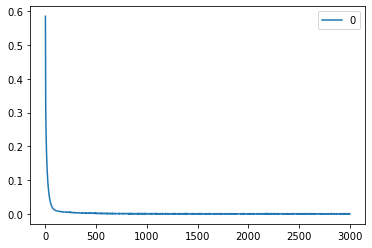

In [116]:
#val_loss = eval_metric(model, history.history, 'loss')
metric = history.history['loss']
val_metric = history.history['val_' + 'loss']

pd.DataFrame(val_metric).plot()

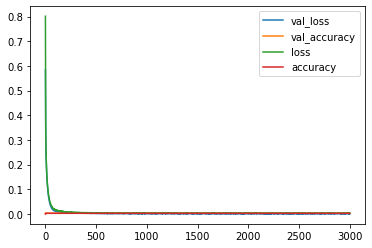

In [117]:
# to plot make data frame out of dict history.history and use .plot() method
pd.DataFrame(history.history).plot()
#pyplot.show()

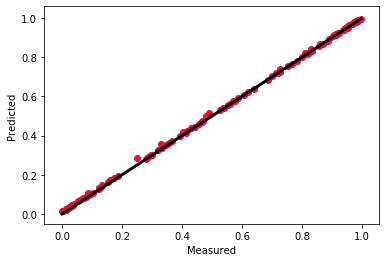

In [118]:
yhat=model.predict(X_test.reshape(X_test.shape[0], k, n_features))
#plt.gca().spines['top'].set_visible(False)

fig, ax = plt.subplots()
#plt.gca().spines['right'].set_visible(False)
ax.scatter(y_test, yhat,  c='crimson')
ax.plot([y_test.min(), yhat.max()], [y_test.min(),  yhat.max()], 'k', lw=3)
#plt.plot(y_test, yhat, zorder=1)  
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

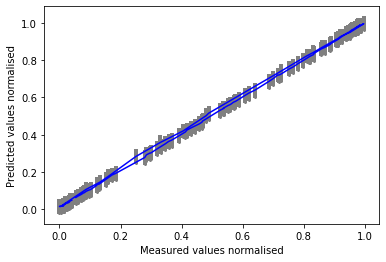

In [119]:
##### plt.scatter(y_test_unscaled , y_pred_unscaled,  color='#0000CC')
fig, ax = plt.subplots()
dy = 0.04
plt.errorbar(y_test, yhat, yerr=dy, fmt='b', color='r',
             ecolor='gray', elinewidth=4, capsize=1);

ax.set_xlabel('Measured values normalised')
ax.set_ylabel('Predicted values normalised')
fig.savefig(fileNameForDLFigures(midfix = 'PredAgainstTested_Charging'))

In [120]:
def unscale(y_values, scaler):
    return scaler.inverse_transform(y_values)

y_pred_unscaled, y_test_unscaled = unscale(yhat, scaler), unscale(y_test, scaler)


In [121]:
y_pred_unscaled = pd.DataFrame(y_pred_unscaled)


In [122]:
y_test_unscaled = pd.DataFrame(y_test_unscaled)

In [123]:
def create_color_step_obj(cmap_name, n):
    """
    Return scalarMap object with n colors in gradient from color map
    given in cmap_name.
    """
    cmap = plt.get_cmap(cmap_name)
    values = range(n)
    cNorm  = clrs.Normalize(vmin=values[0], vmax=values[-1])
    scalarMap = cm.ScalarMappable(norm=cNorm, cmap=cmap)
    return scalarMap

/home/yogender/miniconda3/envs/kerasClone/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fad1d943b90>)

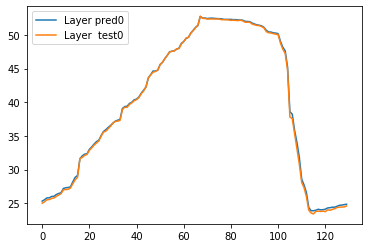

In [124]:
fig = plt.figure(1)
ax = fig.add_subplot(111)

#fig.canvas.draw()
fig.show()
#fig.canvas.draw()
#plt.rcParams["figure.figsize"]=5,5
fig_size = plt.rcParams["figure.figsize"]
#fig_size[0] = 8
#fig_size[1] = 3

def plotyhat_ytest(df_yhat, y_test, ax, fig, alpha =0.7, scm=None):
    #ax.clear()
    #df= df.iloc[:, 1:]
    #df = df.iloc[:, 3:]
    for i in range (0, df_yhat.shape[1]):
        #print ('last shape[1] is:', df.shape[1])
        ax.plot(df_yhat.index, df_yhat.iloc[:, i],\
                label = 'Layer pred' + str(i))
        ax.plot(y_test.index, y_test.iloc[:, i],\
                label = 'Layer  test' + str(i))
        
    #fig.canvas.draw()
    #ax.legend()
    #fig.show()
    #print ('df is :', df)
    plt.legend(loc='upper left')
    return fig, ax
plotyhat_ytest(y_pred_unscaled,y_test_unscaled, ax, fig, alpha =0.7, scm=None)